In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential,layers

In [ ]:
df = pd.read_csv('/content/emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


from matplotlib import pyplot as plt
df['spam'].plot(kind='hist', bins=20, title='spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['spam'].plot(kind='line', figsize=(8, 4), title='spam')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print(df.head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [ ]:
print(df.describe())

              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 2997 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2736 non-null   object
 1   spam    2736 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.1+ KB
None


In [ ]:
df.columns

Index(['text', 'spam', 'processed_text'], dtype='object')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)

df['processed_text'] = df['text'].apply(preprocess_text)

for i in range(3):
    print("Original:", df_1['text'][i])
    print("Preprocessed:", df['processed_text'][i])
    print()


Original: Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability :

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Assuming df contains the dataset
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['spam'], test_size=0.2, random_state=42)

# Model training
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, predictions))


Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       266
           1       1.00      0.98      0.99       282

    accuracy                           0.99       548
   macro avg       0.99      0.99      0.99       548
weighted avg       0.99      0.99      0.99       548



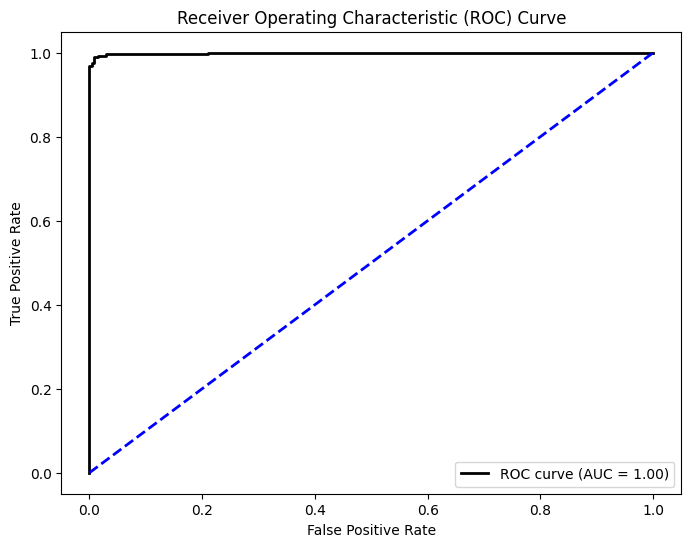

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

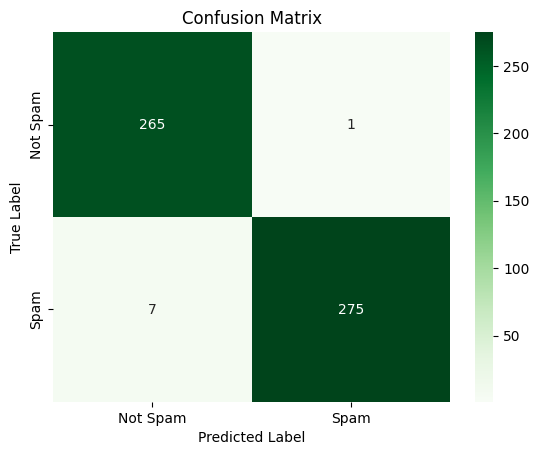

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-37-d88721de8671>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='viridis')


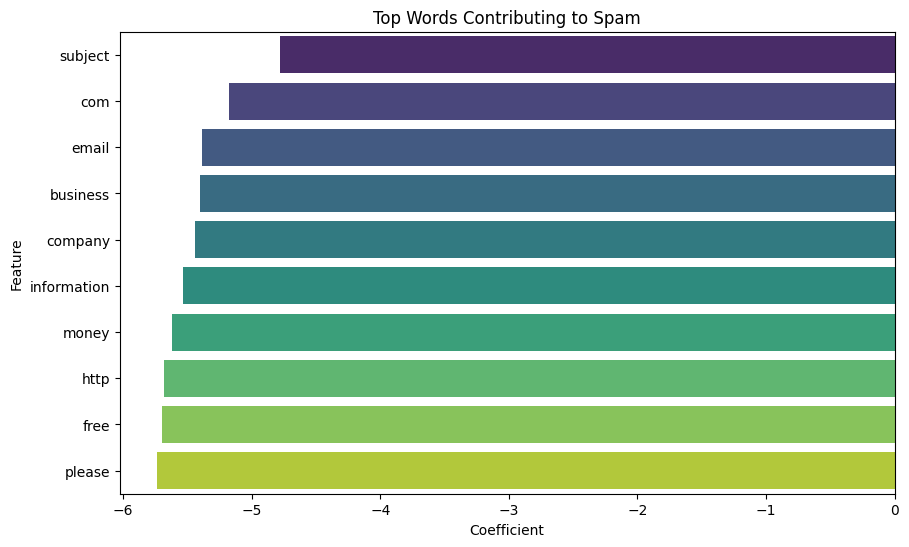

In [ ]:
feature_names = model.named_steps['countvectorizer'].get_feature_names_out()
coefficients = model.named_steps['multinomialnb'].feature_log_prob_[1]

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
top_features = feature_importance_df.sort_values(by='Coefficient', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='viridis')
plt.title('Top Words Contributing to Spam')
plt.show()

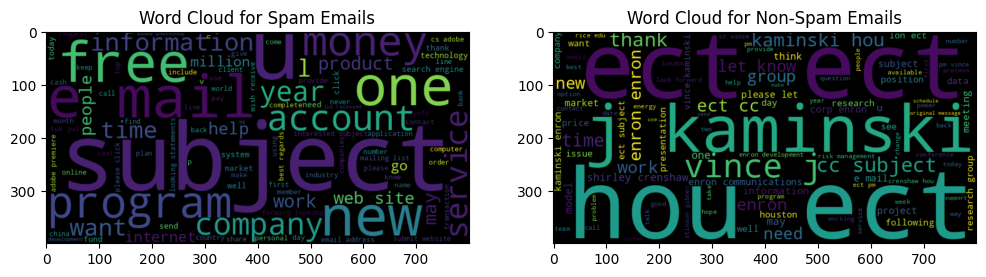

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(df[df['spam'] == 1]['processed_text'])
non_spam_words = ' '.join(df[df['spam'] == 0]['processed_text'])

# Word cloud for spam emails
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=800, height=400, random_state=42, max_words=100).generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')

# Word cloud for non-spam emails
plt.subplot(1, 2, 2)
wordcloud_non_spam = WordCloud(width=800, height=400, random_state=42, max_words=100).generate(non_spam_words)
plt.imshow(wordcloud_non_spam, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam Emails')

plt.show()

In [ ]:
df['spam'].unique()

array([1, 0])

In [ ]:
df['text'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5728 entries, 0 to 5727
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
5728 non-null   object
dtypes: object(1)
memory usage: 44.9+ KB


In [ ]:
df['spam'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5728 entries, 0 to 5727
Series name: spam
Non-Null Count  Dtype
--------------  -----
5728 non-null   int64
dtypes: int64(1)
memory usage: 44.9 KB


In [ ]:
(df['text'].unique)

<bound method Series.unique of 0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object>

In [ ]:
def count_word(word, column):
  words = df[column].astype(str).str.lower().str.split()
  counts = words.apply(lambda x: x.count(word))
  return counts.sum()

word = '0'
column = 'spam'
frequency_0 = count_word(word, column)
print(f'The word "{word}" appears {frequency_0} times in the column "{column}".')

The word "0" appears 4360 times in the column "spam".


In [ ]:
word = '1'
column = 'spam'
frequency_1 = count_word(word, column)
print(f'The word "{word}" appears {frequency_1} times in the column "{column}".')

The word "1" appears 1368 times in the column "spam".


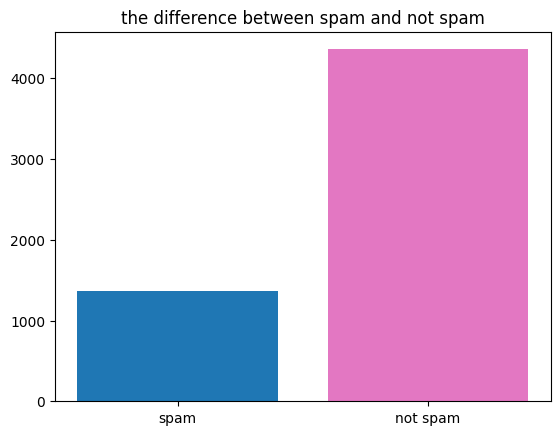

In [ ]:
def plot():
    words = ['spam','not spam']
    freq = [frequency_1 , frequency_0]
    plt.bar(words,freq, color=['tab:blue', 'tab:pink']) # I like them colors
    plt.title('the difference between spam and not spam')
    plt.show()
plot()

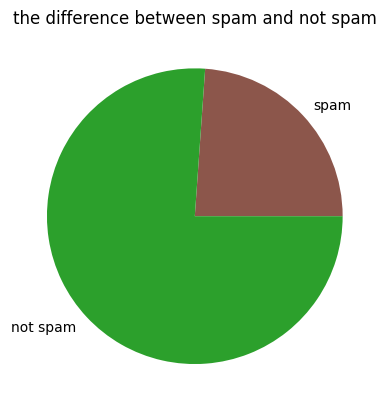

In [ ]:
words = ['spam','not spam']
freq = [frequency_1 , frequency_0]

# Plot a pie chart with labels and colors
plt.pie(freq, labels=words, colors=['tab:brown', 'tab:green']) #again my fav colors

# Add a title to the plot
plt.title('the difference between spam and not spam')

# Show the plot
plt.show()

In [ ]:
# Separate the DataFrame into two groups based on the 'spam' column
df_0 = df[df['spam'] == 0] # The group with spam value 0
df_1 = df[df['spam'] == 1] # The group with spam value 1

# Find the number of rows in the smaller group
n = min(len(df_0), len(df_1))

# Sample n rows from the larger group without replacement
df_0_balanced = df_0.sample(n, replace=False)

# Concatenate the balanced group with the smaller group
df_balanced = pd.concat([df_0_balanced, df_1])
df = df_balanced
# Print the balanced DataFrame
print(df_balanced)

                                                   text  spam
2997  Subject: re : risk ' s advanced stress testing...     0
4971  Subject: re : resume  i appreciate your recomm...     0
4609  Subject: anonymous reporting facilities  this ...     0
1576  Subject: re : various market data charges to t...     0
4774  Subject: re : cairn gas purchase bid  vince , ...     0
...                                                 ...   ...
1363  Subject: are you ready to get it ?  hello !  v...     1
1364  Subject: would you like a $ 250 gas card ?  do...     1
1365  Subject: immediate reply needed  dear sir ,  i...     1
1366  Subject: wanna see me get fisted ?  fist  bang...     1
1367  Subject: hot stock info : drgv announces anoth...     1

[2736 rows x 2 columns]


In [ ]:
word = '0'
column = 'spam'
frequency_fixed_0 = count_word(word, column)
print(f'The word "{word}" appears {frequency_fixed_0} times in the column "{column}".')

The word "0" appears 1368 times in the column "spam".


In [ ]:
word = '1'
column = 'spam'
frequency_fixed_1 = count_word(word, column)
print(f'The word "{word}" appears {frequency_fixed_1} times in the column "{column}".')

The word "1" appears 1368 times in the column "spam".


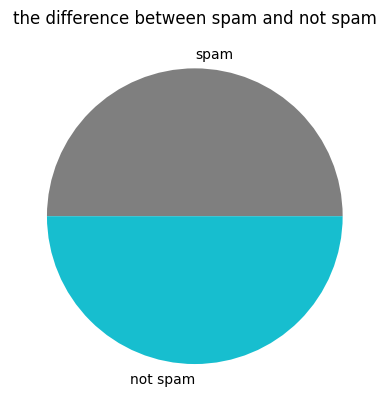

In [ ]:
words = ['spam','not spam']
frequency = [frequency_fixed_1 , frequency_fixed_0]

# Plot a pie chart with labels and colors
plt.pie(frequency, labels=words, colors=['tab:gray', 'tab:cyan']) #again my fav colors

# Add a title to the plot
plt.title('the difference between spam and not spam')

# Show the plot
plt.show()

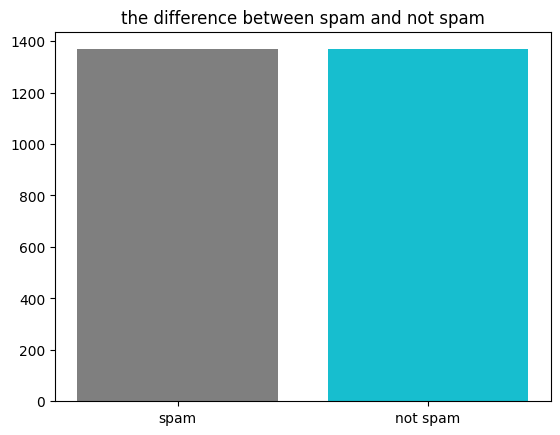

In [ ]:
 def plot():
    words = ['spam','not spam']
    freq = [frequency_fixed_1 , frequency_fixed_0]
    plt.bar(words,freq, color=['tab:gray', 'tab:cyan']) # I like them colors
    plt.title('the difference between spam and not spam')
    plt.show()
plot()